## <center>SUPERNATURAL EMPOWERMENT SUMMIT, '23 </center>

### IMPORT PACKAGES

In [1]:
#Data Handling
import numpy as np
import pandas as pd

#Visualizations
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from termcolor import colored

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import LabelEncoder

# Evaluation Metrics
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, fbeta_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE

#Other packages
import warnings
warnings.filterwarnings('always') 

In [2]:
# Overview of the dataset

ses23 = pd.read_csv("C:/Users/KWABENABOATENG/Desktop/DATA ANALYSIS/PERSONAL/SES 2023/SUPERNATURAL-EMPOWERMENT-SUMMIT---2023/SES '23.csv")
ses23

,Timestamp,Title,First Name,Last Name,Mobile Number,WhatsApp Number,Email Address,Country,Occupation,Name of Church
0,2023/05/22 7:06:16 PM GMT,Mr,Evans,Coffie,0249884472,0249884472,NaN,Ghana,NaN,Teminar
1,2023/05/22 7:07:14 PM GMT,Mr,Noble,King,0240219533,0240219533,NaN,Ghana,NaN,Perez Chapel
2,2023/05/22 7:07:20 PM GMT,Mr,Appiedu,Owusu Acheampong,0244450039,0244450039,appiedu.acheampong@gmail.com,Ghana,NaN,Perz Chapel
3,2023/05/22 7:08:43 PM GMT,Rev,Albert,T Kamara,0243801382,0243801382,NaN,Ghana,NaN,Perez Chapel
4,2023/05/22 7:08:43 PM GMT,Rev.,David K.,Smith,0245127629,0245127629,rev.davidkwesismith@yahoo.com,Ghana,"Cleric (Pastors, Reverends etc)",C.Y.N
...,...,...,...,...,...,...,...,...,...,...
3593,2023/06/13 4:07:53 PM GMT,MR,MARCUS,DELA,0244021980,NaN,NaN,GHANA,NaN,PEREZ
3594,2023/06/13 4:08:47 PM GMT,MR,PATRICK,AMEGAZO,0597998224,NaN,NaN,GHANA,NaN,PEREZ
3595,2023/06/13 4:09:33 PM GMT,REV,EBENEZER,ALIBANWIE,0203044808,NaN,NaN,GHANA,NaN,MPCI
3596,2023/06/13 4:10:45 PM GMT,PASTOR,RAPHAEL,LAMKPOR,0249415892,NaN,NaN,GHANA,NaN,MPCI


In [3]:
# Check the shape of the dataset.

ses23.shape

(3598, 10)

In [4]:
ses23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Timestamp        3598 non-null   object
 1   Title            3598 non-null   object
 2   First Name       3598 non-null   object
 3   Last Name        3598 non-null   object
 4   Mobile Number    3598 non-null   object
 5   WhatsApp Number  883 non-null    object
 6   Email Address    1467 non-null   object
 7   Country          3598 non-null   object
 8   Occupation       209 non-null    object
 9   Name of Church   3188 non-null   object
dtypes: object(10)
memory usage: 281.2+ KB


In [5]:
ses23.isnull()

,Timestamp,Title,First Name,Last Name,Mobile Number,WhatsApp Number,Email Address,Country,Occupation,Name of Church
0,False,False,False,False,False,False,True,False,True,False
1,False,False,False,False,False,False,True,False,True,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3593,False,False,False,False,False,True,True,False,True,False
3594,False,False,False,False,False,True,True,False,True,False
3595,False,False,False,False,False,True,True,False,True,False
3596,False,False,False,False,False,True,True,False,True,False


In [6]:
ses23.isnull().sum()

Timestamp             0
Title                 0
First Name            0
Last Name             0
Mobile Number         0
WhatsApp Number    2715
Email Address      2131
Country               0
Occupation         3389
Name of Church      410
dtype: int64

In [7]:
# Check for the total null values.

ses23.isnull().sum().sum()

8645

In [8]:
ses23

,Timestamp,Title,First Name,Last Name,Mobile Number,WhatsApp Number,Email Address,Country,Occupation,Name of Church
0,2023/05/22 7:06:16 PM GMT,Mr,Evans,Coffie,0249884472,0249884472,NaN,Ghana,NaN,Teminar
1,2023/05/22 7:07:14 PM GMT,Mr,Noble,King,0240219533,0240219533,NaN,Ghana,NaN,Perez Chapel
2,2023/05/22 7:07:20 PM GMT,Mr,Appiedu,Owusu Acheampong,0244450039,0244450039,appiedu.acheampong@gmail.com,Ghana,NaN,Perz Chapel
3,2023/05/22 7:08:43 PM GMT,Rev,Albert,T Kamara,0243801382,0243801382,NaN,Ghana,NaN,Perez Chapel
4,2023/05/22 7:08:43 PM GMT,Rev.,David K.,Smith,0245127629,0245127629,rev.davidkwesismith@yahoo.com,Ghana,"Cleric (Pastors, Reverends etc)",C.Y.N
...,...,...,...,...,...,...,...,...,...,...
3593,2023/06/13 4:07:53 PM GMT,MR,MARCUS,DELA,0244021980,NaN,NaN,GHANA,NaN,PEREZ
3594,2023/06/13 4:08:47 PM GMT,MR,PATRICK,AMEGAZO,0597998224,NaN,NaN,GHANA,NaN,PEREZ
3595,2023/06/13 4:09:33 PM GMT,REV,EBENEZER,ALIBANWIE,0203044808,NaN,NaN,GHANA,NaN,MPCI
3596,2023/06/13 4:10:45 PM GMT,PASTOR,RAPHAEL,LAMKPOR,0249415892,NaN,NaN,GHANA,NaN,MPCI


### INSIGHTS

In this data sets, there are;
* 3598 rows & 10 columns.

In [9]:
#Check for missing values in this dataset.

ses23.isna().sum()

Timestamp             0
Title                 0
First Name            0
Last Name             0
Mobile Number         0
WhatsApp Number    2715
Email Address      2131
Country               0
Occupation         3389
Name of Church      410
dtype: int64

#### INSIGHTS

There were missing values in four columns of the dataset.<br>
They are:
* WhatsApp column       - 2715 missing values.
* Email Address column  - 2131 missing values.
* Occupation column     - 3389 missing values.
* Name of Church column - 410 missing values.

In [10]:
ses23.describe(include='all')

,Timestamp,Title,First Name,Last Name,Mobile Number,WhatsApp Number,Email Address,Country,Occupation,Name of Church
count,3598,3598,3598,3598,3598,883,1467,3598,209,3188
unique,3554,109,1692,2536,3190,836,1437,86,7,763
top,2023/05/23 8:01:51 PM GMT,Mr,Emmanuel,Mensah,-,0243181458,—,Ghana,"Cleric (Pastors, Reverends etc)",Perez
freq,2,1035,50,51,14,3,4,2418,98,546


### FEATURE ENGINEERING

In [11]:
#Create a copy of the original test dataset

ses23.copy = ses23.copy()

In [12]:
ses23.drop (columns=['Timestamp', 'WhatsApp Number', 'Email Address'], inplace = True)

In [13]:
ses23

,Title,First Name,Last Name,Mobile Number,Country,Occupation,Name of Church
0,Mr,Evans,Coffie,0249884472,Ghana,NaN,Teminar
1,Mr,Noble,King,0240219533,Ghana,NaN,Perez Chapel
2,Mr,Appiedu,Owusu Acheampong,0244450039,Ghana,NaN,Perz Chapel
3,Rev,Albert,T Kamara,0243801382,Ghana,NaN,Perez Chapel
4,Rev.,David K.,Smith,0245127629,Ghana,"Cleric (Pastors, Reverends etc)",C.Y.N
...,...,...,...,...,...,...,...
3593,MR,MARCUS,DELA,0244021980,GHANA,NaN,PEREZ
3594,MR,PATRICK,AMEGAZO,0597998224,GHANA,NaN,PEREZ
3595,REV,EBENEZER,ALIBANWIE,0203044808,GHANA,NaN,MPCI
3596,PASTOR,RAPHAEL,LAMKPOR,0249415892,GHANA,NaN,MPCI


In [14]:
ses23.isnull()

,Title,First Name,Last Name,Mobile Number,Country,Occupation,Name of Church
0,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3593,False,False,False,False,False,True,False
3594,False,False,False,False,False,True,False
3595,False,False,False,False,False,True,False
3596,False,False,False,False,False,True,False


In [15]:
ses23.isnull().sum()

Title                0
First Name           0
Last Name            0
Mobile Number        0
Country              0
Occupation        3389
Name of Church     410
dtype: int64

In [16]:
ses23['Occupation'].fillna('Pastor', inplace=True)

In [17]:
ses23['Name of Church'].fillna('Perez Chapel', inplace=True)

In [18]:
ses23['Name of Church'].unique()

array(['Teminar', 'Perez Chapel', 'Perz Chapel', 'C.Y.N',
       'Perez Chapel, Lome', 'Peniel', 'PEREZ TRASAACO', 'GIPM',
       'Perez Dome', 'Perez ', 'Perez Dome ', 'R.D',
       'Living Hope Internetional', 'Perez', 'L.D.S', 'LGCG', 'PCI',
       'Calvary Power', 'Dome', 'FOLP', 'C.O.P', 'GHARIS', 'Coin Int',
       'PCM', 'TBC', 'AWG', 'Perez Aflao ', 'Cantoments', 'PCI Denu',
       'Perez/French', 'PCI ', 'Perez French ', 'Action Chapel',
       'Christ Lunie du Nation', 'LGC', 'FMBU', 'MK', 'Royalhouse', 'WCI',
       'KCIC', 'Fire family', 'Top Church International ', 'TAC',
       'Ghana ', 'Fiqa', 'Pentecost', 'Perez Amanfro', 'Jesus Power',
       'Anglican', 'KCM', 'VGM', 'HKOMI', '3R', 'Perez- zoeland ', 'EECA',
       'ATOG', 'Havest', 'Posibilities', 'HJM', 'LIBC', 'Perez Zoeland ',
       'Roman', 'Church of Christ', 'Rapha Centre', '-', 'Pci', 'ICGC',
       'CSWC', 'MELN ', 'EFC', 'MELN', 'First Century', 'Deeper Life',
       'TFGM', 'AWC', 'Harvest Trmple', 'Zoela

In [40]:
ses23['Name of Church'] = ses23['Name of Church'].replace('Perz Chapel','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Chapel, Lome','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Dome','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Dome ','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Dome','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCM','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Aflao ','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Cantoments','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI Denu','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez/French','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI ','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez French ','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Amanfro','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez- zoeland ','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Zoeland ','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Pci','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Zoeland','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCi','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI-La','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Chapel ','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI Zoe','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Zealand','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI Dome','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('P C I','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Dome-Above Chapel ','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI Hq','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Takoradi','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI FRENCH','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI DOME','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Pci Nkwanta','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez/Amsterdam','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez/Dome','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Zoeland ','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Dome ','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Pci/ French','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI French','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Campus Ministry','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Campus Ministry ','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Pci ','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI-Dome','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez DOme','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI-Zoeland','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PCI-Atomic','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')

ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ChapelDome','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ChapelHq','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ChapelFRENCH','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ChapelZoe','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ChapelHq','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ChapelFRENCH','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ChapelDOME','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez Chapel/ French','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ChapelFrench','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('Perez ChapelNkwanta','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')
ses23['Name of Church'] = ses23['Name of Church'].replace('PEREZ TRASAACO','Perez Chapel')


In [41]:
ses23['Name of Church'].unique()

array(['Teminar', 'Perez Chapel', 'C.Y.N', 'Peniel', 'GIPM', 'R.D',
       'Living Hope Internetional', 'L.D.S', 'LGCG', 'PCI',
       'Calvary Power', 'FOLP', 'C.O.P', 'GHARIS', 'Coin Int', 'TBC',
       'AWG', 'Action Chapel', 'Christ Lunie du Nation', 'LGC', 'FMBU',
       'MK', 'Royalhouse', 'WCI', 'KCIC', 'Fire family',
       'Top Church International ', 'TAC', 'Ghana ', 'Fiqa', 'Pentecost',
       'Jesus Power', 'Anglican', 'KCM', 'VGM', 'HKOMI', '3R', 'EECA',
       'ATOG', 'Havest', 'Posibilities', 'HJM', 'LIBC', 'Roman',
       'Church of Christ', 'Rapha Centre', '-', 'ICGC', 'CSWC', 'MELN ',
       'EFC', 'MELN', 'First Century', 'Deeper Life', 'TFGM', 'AWC',
       'Harvest Trmple', 'Builders Christian church', 'UBCI', 'Brigade',
       'KLM', 'Torchworld Ministries', 'Possibilities ',
       'Assemblies of God', 'AIG', 'Light of life', 'Blessed', 'MDRC',
       'QFC', 'Kiwgiv', 'Foursquare', 'Fours quare', 'First fruit',
       'Shiloh Outreach ', 'CEE', 'Church of God', '

In [21]:
ses23

,Title,First Name,Last Name,Mobile Number,Country,Occupation,Name of Church
0,Mr,Evans,Coffie,0249884472,Ghana,Pastor,Teminar
1,Mr,Noble,King,0240219533,Ghana,Pastor,Perez Chapel
2,Mr,Appiedu,Owusu Acheampong,0244450039,Ghana,Pastor,Perez Chapel
3,Rev,Albert,T Kamara,0243801382,Ghana,Pastor,Perez Chapel
4,Rev.,David K.,Smith,0245127629,Ghana,"Cleric (Pastors, Reverends etc)",C.Y.N
...,...,...,...,...,...,...,...
3593,MR,MARCUS,DELA,0244021980,GHANA,Pastor,PEREZ
3594,MR,PATRICK,AMEGAZO,0597998224,GHANA,Pastor,PEREZ
3595,REV,EBENEZER,ALIBANWIE,0203044808,GHANA,Pastor,MPCI
3596,PASTOR,RAPHAEL,LAMKPOR,0249415892,GHANA,Pastor,MPCI


In [22]:
ses23['Title'].unique()

array(['Mr', 'Rev ', 'Rev.', 'Pastor', 'ELDER MRS.', 'Mrs.', 'Mrs', 'Ps',
       'Ms', 'Ms.', 'Mr.', 'Miss', 'Mrs ', 'Dr.', 'Rev', 'Miss ', 'Mr ',
       'REV ', 'REV', 'SP', 'Mr. ', 'Mis', 'Apostle', 'Rev. ',
       'Cell leader ', 'Ms ', 'Deacon', 'Cell leader', 'Reverend',
       'Minister', 'Madam', 'Ps. ', 'Elder', 'Bro', 'Hon', 'Me', 'Ps.',
       'Sir', 'Pastor ', 'Bishop', 'Deaconess ', 'Apostle ', 'Madam ',
       'Prophet ', 'Dr', 'Djicopitro', 'Deaconess', 'Evangelist',
       'Evangelist ', 'Pas', 'MRS', 'Mrs. ', 'MADAM', 'MR', 'PASTOR',
       'MADAM ', 'Elder ', 'F', 'Apt', 'Asafo Maame', 'Reverend ',
       'Mr/Ms', 'P. Eld.', 'Evang', 'Presiding Elder', 'M & E', 'M & E ',
       'Bishop ', 'Prophet', 'Deacon ', 'mrs', 'Daniel', 'MISS', 'Mrs  ',
       'Mes', 'Mt', 'Min', 'Madame ', 'Mr..', 'Pst', 'Mre', 'Mr/Miss',
       'PS', 'Apst', 'Prof', 'MRS ', 'PS ', 'Mad', 'Deaconnes', 'Eld',
       'Overseer', 'Brother ', 'Mme', 'Evan', 'Rev. Prophet', 'Pat ',
       'Rev. Dr',

In [23]:
ses23['Title'] = ses23['Title'].replace('Presiding Elderer','Presiding Elder')
ses23['Title'] = ses23['Title'].replace('Rev ','Rev')
ses23['Title'] = ses23['Title'].replace('Pastor','Ps')
ses23['Title'] = ses23['Title'].replace('ELDER MRS.','Elder Mrs')
ses23['Title'] = ses23['Title'].replace('Mrs.','Mrs')
ses23['Title'] = ses23['Title'].replace('Ms','Miss')
ses23['Title'] = ses23['Title'].replace('Ms.','Miss')
ses23['Title'] = ses23['Title'].replace('Mr.','Mr')
ses23['Title'] = ses23['Title'].replace('Mrs ','Mrs')
ses23['Title'] = ses23['Title'].replace('Dr.','Dr')
ses23['Title'] = ses23['Title'].replace('Miss ','Miss')
ses23['Title'] = ses23['Title'].replace('Mr ','Mr')
ses23['Title'] = ses23['Title'].replace('REV ','Rev')
ses23['Title'] = ses23['Title'].replace('REV','Rev')
ses23['Title'] = ses23['Title'].replace('SP','Ps')
ses23['Title'] = ses23['Title'].replace('Mr. ','Mr')
ses23['Title'] = ses23['Title'].replace('Mis','Miss')
ses23['Title'] = ses23['Title'].replace('Rev. ','Rev')
ses23['Title'] = ses23['Title'].replace('Cell leader ','Cell leader')
ses23['Title'] = ses23['Title'].replace('Ms ','Miss')
ses23['Title'] = ses23['Title'].replace('Reverend','Rev')
ses23['Title'] = ses23['Title'].replace('Madam','Mrs')
ses23['Title'] = ses23['Title'].replace('Ps. ','Ps')
ses23['Title'] = ses23['Title'].replace('Bro','Mr')
ses23['Title'] = ses23['Title'].replace('Me','Mr')
ses23['Title'] = ses23['Title'].replace('Ps.','Ps')
ses23['Title'] = ses23['Title'].replace('Sir','Mr')
ses23['Title'] = ses23['Title'].replace('Pastor ','Ps')
ses23['Title'] = ses23['Title'].replace('Deaconess ','Deaconess')
ses23['Title'] = ses23['Title'].replace('Apostle ','Apostle')
ses23['Title'] = ses23['Title'].replace('Madam ','Mrs')
ses23['Title'] = ses23['Title'].replace('Prophet ','Prophet')
ses23['Title'] = ses23['Title'].replace('Evangelist ','Evangelist')
ses23['Title'] = ses23['Title'].replace('Pas')
ses23['Title'] = ses23['Title'].replace('MRS','Mrs')
ses23['Title'] = ses23['Title'].replace('Mrs. ','Mrs')
ses23['Title'] = ses23['Title'].replace('MADAM','Mrs')
ses23['Title'] = ses23['Title'].replace('MR','Mr')
ses23['Title'] = ses23['Title'].replace('PASTOR','Ps')
ses23['Title'] = ses23['Title'].replace('MADAM ','Mrs')
ses23['Title'] = ses23['Title'].replace('Elder ','Elder')
ses23['Title'] = ses23['Title'].replace('Apt', 'Apostle')
ses23['Title'] = ses23['Title'].replace('F','Mr')
ses23['Title'] = ses23['Title'].replace('Asafo Maame','Mrs')
ses23['Title'] = ses23['Title'].replace('Reverend ','Rev')
ses23['Title'] = ses23['Title'].replace('Mr/Ms','Mr')
ses23['Title'] = ses23['Title'].replace('P. Eld.','Presiding Elder')
ses23['Title'] = ses23['Title'].replace('Evang','Evangelist')
ses23['Title'] = ses23['Title'].replace('M & E','Mr')
ses23['Title'] = ses23['Title'].replace('Bishop ','Bishop')
ses23['Title'] = ses23['Title'].replace('Deacon ','Deacon')
ses23['Title'] = ses23['Title'].replace('mrs','Mrs')
ses23['Title'] = ses23['Title'].replace('Daniel','Mr')
ses23['Title'] = ses23['Title'].replace('MISS','Miss')
ses23['Title'] = ses23['Title'].replace('Mrs  ','Mrs')
ses23['Title'] = ses23['Title'].replace('Mes','Mrs')
ses23['Title'] = ses23['Title'].replace('Mt','Mr')
ses23['Title'] = ses23['Title'].replace('Min','Mr')
ses23['Title'] = ses23['Title'].replace('Madame ','Mrs')
ses23['Title'] = ses23['Title'].replace('Mr..','Mr')
ses23['Title'] = ses23['Title'].replace('Pst','Ps')
ses23['Title'] = ses23['Title'].replace('Mre','Mrs')
ses23['Title'] = ses23['Title'].replace('Mr/Miss','Mr')
ses23['Title'] = ses23['Title'].replace('PS','Ps')
ses23['Title'] = ses23['Title'].replace('Apst','Apostle')
ses23['Title'] = ses23['Title'].replace('MRS ','Mrs')
ses23['Title'] = ses23['Title'].replace('PS ','Ps')
ses23['Title'] = ses23['Title'].replace('Mad','Mrs')
ses23['Title'] = ses23['Title'].replace('Deaconnes','Deaconess')
ses23['Title'] = ses23['Title'].replace('Eld','Elder')
ses23['Title'] = ses23['Title'].replace('Overseer','Ps')
ses23['Title'] = ses23['Title'].replace('Brother ','Mr')
ses23['Title'] = ses23['Title'].replace('Mme','Mrs')
ses23['Title'] = ses23['Title'].replace('Evan','Evangelist')
ses23['Title'] = ses23['Title'].replace('Pat ','Ps')
ses23['Title'] = ses23['Title'].replace('Master','Mr')
ses23['Title'] = ses23['Title'].replace('Ps ','Ps')
ses23['Title'] = ses23['Title'].replace('Prb','Prophet')
ses23['Title'] = ses23['Title'].replace('Prb ','Prophet')
ses23['Title'] = ses23['Title'].replace('Madam Awortwe','Mrs')
ses23['Title'] = ses23['Title'].replace('Doctor ','Dr')
ses23['Title'] = ses23['Title'].replace('M','Mr')
ses23['Title'] = ses23['Title'].replace('MR','Mr')
ses23['Title'] = ses23['Title'].replace('mr','Mr')
ses23['Title'] = ses23['Title'].replace('MS','Miss')
ses23['Title'] = ses23['Title'].replace('BISHOP','Bishop')
ses23['Title'] = ses23['Title'].replace('PROPHET','Prophet')
ses23['Title'] = ses23['Title'].replace('M & E ','Mr')
ses23['Title'] = ses23['Title'].replace('Djicopitro','Mr')
ses23['Title'] = ses23['Title'].replace('MR ','Mr')
ses23['Title'] = ses23['Title'].replace('Rev.','Rev')
ses23['Title'] = ses23['Title'].replace('Minister','Mr')
ses23['Title'] = ses23['Title'].replace('Rev. Dr','Rev')
ses23['Title'] = ses23['Title'].replace('Rev. Prophet' ,'Prophet')

In [24]:
ses23['Title'].unique()

array(['Mr', 'Rev', 'Ps', 'Elder Mrs', 'Mrs', 'Miss', 'Dr', 'Apostle',
       'Cell leader', 'Deacon', 'Elder', 'Hon', 'Bishop', 'Deaconess',
       'Prophet', 'Evangelist', 'Presiding Elder', 'Prof'], dtype=object)

In [25]:
print("These are the unique titles and their count in this dataset: ")

ses23['Title'].value_counts()

These are the unique titles and their count in this dataset: 


Title
Mr                 1466
Mrs                 973
Miss                600
Ps                  232
Rev                 200
Apostle              31
Elder                23
Evangelist           13
Deaconess            11
Bishop               10
Prophet              10
Deacon               10
Dr                   10
Hon                   2
Cell leader           2
Presiding Elder       2
Prof                  2
Elder Mrs             1
Name: count, dtype: int64

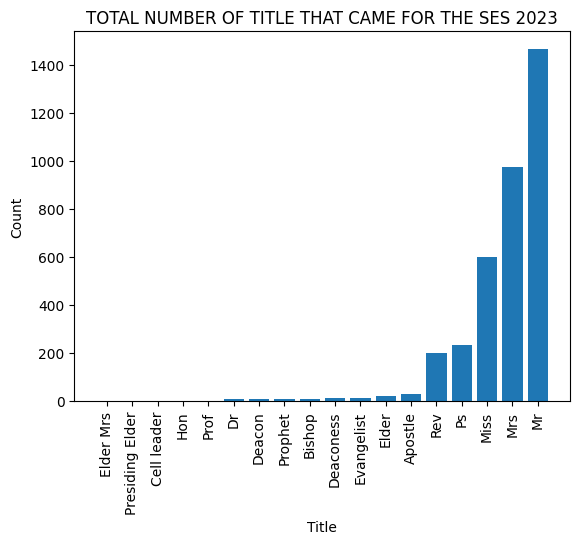

In [26]:
Total_title = ses23['Title'].value_counts()

# Sort in descending order
Total_title  = Total_title .sort_values(ascending=True)

# Set up the figure and axes
fig, ax = plt.subplots()

# Create a bar plot
ax.bar(Total_title .index, Total_title.values)

# Customize the plot
ax.set_title('TOTAL NUMBER OF TITLE THAT CAME FOR THE SES 2023')
ax.set_xlabel('Title')
ax.set_ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [27]:
ses23['Country'].unique()

array(['Ghana', 'Togo', 'GHANA', 'Ghana ', 'Nigeria', 'Gabon',
       'Netherlands ', 'Tchad ', 'Benin', 'Tchad', 'Congo', 'France',
       'Ghaba', 'GHANA ', 'Ghans', 'Nigeria ', 'United Kingdom ', 'Togo ',
       'Senegal', 'Cameroon ', 'Ghanaian ', 'Congo ', 'Gabon ', 'Guinea',
       'Benin ', 'Ivory coast', 'Chad', 'Lvory coast ', 'Coast Ivory',
       "Cote D'Ivoire ", 'C I', 'Cote divoire', 'Holland', 'Niger',
       'Côté d’Ivoire', 'CAR', 'Burkina Faso', 'Ivory Coast ',
       'Cole divore ', 'Swiss', 'Sierra Leone', 'Gabon/Ghana', 'R.D.C',
       "Cote D'Ivorie", "Cote D'Ivoire", 'Ghana/US', 'South Africa ',
       'lawsoneleanor920@gmail.com', 'Cote D’Ivoire', 'Cote D’Ivoire ',
       'Zambia', 'Abijan', 'C.A.R', 'South Africa', 'CHC',
       'darkohilda@gmail.com', "Cóte D'voire", 'Cote d ivai', 'Mali',
       'Ivory Coast', 'RCI', 'RCI ', 'T Chad', 'UK', 'Cameroon', 'Guana',
       'Belgique', 'C. A. R', 'C.I', "Cote d'Ivoire ", 'Cote D’Ivore',
       'Preciouskaledzi77@gm

In [28]:
ses23['Country'] = ses23['Country'].replace('GHANA','Ghana')
ses23['Country'] = ses23['Country'].replace('Ghana ','Ghana')
ses23['Country'] = ses23['Country'].replace('Netherlands ','Netherlands')
ses23['Country'] = ses23['Country'].replace('Tchad ','Chad')
ses23['Country'] = ses23['Country'].replace('Tchad','Chad')
ses23['Country'] = ses23['Country'].replace('Ghaba','Ghana')
ses23['Country'] = ses23['Country'].replace('GHANA ','Ghana')
ses23['Country'] = ses23['Country'].replace('Ghans','Ghana')
ses23['Country'] = ses23['Country'].replace('Nigeria ','Nigeria')
ses23['Country'] = ses23['Country'].replace('United Kingdom ','United Kingdom')
ses23['Country'] = ses23['Country'].replace('Togo ','Togo')
ses23['Country'] = ses23['Country'].replace('Cameroon ','Cameroon')
ses23['Country'] = ses23['Country'].replace('Ghanaian ','Ghana')
ses23['Country'] = ses23['Country'].replace('Congo ','Congo')
ses23['Country'] = ses23['Country'].replace('Gabon ','Gabon')
ses23['Country'] = ses23['Country'].replace('Benin ','Benin')
ses23['Country'] = ses23['Country'].replace('Ivory coast','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Lvory coast ','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Coast Ivory','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace("Cote D'Ivoire ",'Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('C I','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Cote divoire','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('CAR','Central African Republic')
ses23['Country'] = ses23['Country'].replace('Ivory Coast ','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Cole divore ','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Gabon/Ghana','Gabon')
ses23['Country'] = ses23['Country'].replace('R.D.C','Democratic Republic of Congo')
ses23['Country'] = ses23['Country'].replace("Cote D'Ivorie",'Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Ghana/US','Ghana')
ses23['Country'] = ses23['Country'].replace('South Africa ','South Africa')
ses23['Country'] = ses23['Country'].replace('lawsoneleanor920@gmail.com','Ghana')
ses23['Country'] = ses23['Country'].replace('Cote D’Ivoire','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Cote D’Ivoire ','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('C.A.R','Central African Republic')
ses23['Country'] = ses23['Country'].replace('darkohilda@gmail.com','Ghana')
ses23['Country'] = ses23['Country'].replace("Cóte D'voire",'Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Cote d ivai','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Ivory Coast','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('T Chad','Chad')
ses23['Country'] = ses23['Country'].replace('UK','United Kingdom')
ses23['Country'] = ses23['Country'].replace('C. A. R','Central African Republic')
ses23['Country'] = ses23['Country'].replace('C.I','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Cote D’Ivore','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Preciouskaledzi77@gmail.com','Ghana')
ses23['Country'] = ses23['Country'].replace('Ghanan','Ghana')
ses23['Country'] = ses23['Country'].replace('C.A.R ','Central African Republic')
ses23['Country'] = ses23['Country'].replace('Central African Republic ','Central African Republic')
ses23['Country'] = ses23['Country'].replace("Cote d' ivior",'Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('CMR','Cameroon')
ses23['Country'] = ses23['Country'].replace('USA','United States of America')
ses23['Country'] = ses23['Country'].replace('CONGO','Congo')
ses23['Country'] = ses23['Country'].replace('GABON','Gabon')
ses23['Country'] = ses23['Country'].replace('CHAD','Chad')
ses23['Country'] = ses23['Country'].replace('SENEGAL','Senegal')
ses23['Country'] = ses23['Country'].replace('COTE DIVOIRE','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('BURKINA FASO','Burkina Faso')
ses23['Country'] = ses23['Country'].replace('SOUTH AFRICA','South Africa')
ses23['Country'] = ses23['Country'].replace('ghana','Ghana')
ses23['Country'] = ses23['Country'].replace('Guana','Ghana')
ses23['Country'] = ses23['Country'].replace("Cote D'Ivoire",'Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace("Cote d'Ivoire ",'Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Abijan','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('RCI','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('RCI ','Côté d’Ivoire')
ses23['Country'] = ses23['Country'].replace('Swiss','Switzerland')
ses23['Country'] = ses23['Country'].replace('CHC','Ghana')

In [29]:
ses23['Country'].unique()

array(['Ghana', 'Togo', 'Nigeria', 'Gabon', 'Netherlands', 'Chad',
       'Benin', 'Congo', 'France', 'United Kingdom', 'Senegal',
       'Cameroon', 'Guinea', 'Côté d’Ivoire', 'Holland', 'Niger',
       'Central African Republic', 'Burkina Faso', 'Switzerland',
       'Sierra Leone', 'Democratic Republic of Congo', 'South Africa',
       'Zambia', 'Mali', 'Belgique', 'United States of America'],
      dtype=object)

In [30]:
ses23['Country'].value_counts()

Country
Ghana                           3294
Côté d’Ivoire                     75
Congo                             54
Gabon                             49
Benin                             35
Togo                              20
Nigeria                           13
Chad                              10
Central African Republic           7
Cameroon                           7
Senegal                            5
South Africa                       5
France                             4
United Kingdom                     3
Burkina Faso                       3
Guinea                             2
Mali                               2
Sierra Leone                       2
Belgique                           1
Zambia                             1
Holland                            1
Democratic Republic of Congo       1
Switzerland                        1
Niger                              1
Netherlands                        1
United States of America           1
Name: count, dtype: int64

In [31]:
ses23['Occupation'].unique()

array(['Pastor', 'Cleric (Pastors, Reverends etc)', 'Business Owners',
       'Students', 'White collar (those with office jobs)',
       'Civil servant (police, immigration, etc)',
       'Blue collar (those into construction, painting, plumbing etc)',
       'Educationists (e.g. teachers, lecturers )'], dtype=object)

In [32]:
ses23['Occupation'].value_counts()

Occupation
Pastor                                                           3389
Cleric (Pastors, Reverends etc)                                    98
White collar (those with office jobs)                              72
Students                                                           18
Business Owners                                                     9
Blue collar (those into construction, painting, plumbing etc)       9
Civil servant (police, immigration, etc)                            2
Educationists (e.g. teachers, lecturers )                           1
Name: count, dtype: int64